<small><img src=https://raw.githubusercontent.com/ia4legos/MachineLearning/main/images/IASAC-UMH.png width="450" height="200"></small>

# <font color="steelblue">Máquinas de vector soporte no lineales</font>

**Autoría**: 

*   Fernando Borrás (f.borras@umh.es)
*   Federico Botella (federico@umh.es)
*   Inés Hernández (ines.hernandezp@umh.es)
*   Mª Asunción Martínez Mayoral (asun.mayoral@umh.es)
*   Josep Moltó (j.molto@umh.es)
*   Javier Morales (j.morales@umh.es) 

Departamento de Estadística, Matemáticas e Informática. 

Universidad Miguel Hernández de Elche. 


**Financiación**: El material que aparece a continuación se ha desarrollado dentro del marco del proyecto UNIDIGITAL- IASAC.

**Fecha última edición**: 05/03/2023

**Licencia**: <small><a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /></small>

No olvides hacer una copia si deseas utilizarlo. Al usar estos contenidos, acepta nuestros términos de uso y nuestra política de privacidad. 


## <font color="steelblue">Configuración del cuaderno</font>

Para garantizar la funcionalidad completa de este cuaderno, es preciso ejecutar la celda de código a continuación.

In [ ]:
#@title <b><font color="steelblue" size="+1"> Configuración de cuaderno

# Cargamos módulos
from io import StringIO 
import sys
import numpy as np      # importamos numpy como np
import pandas as pd     # importamos pandas como pd
import math             # importamos módulo para cáculos matemáticos

# Esta línea configura matplotlib para mostrar las figuras incrustadas en el jupyter notebook
# Configuraciónde entorno gráfico
%matplotlib inline
import matplotlib.pyplot as plt # importamos matplotlib como plt
import seaborn as sns # importamos seaborn como sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'retina'

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

with Capturing() as output:
    print('Comenzamos....')

with Capturing(output) as output:
    # Librerías
    import os
    !pip install jupyterquiz
    from jupyterquiz import display_quiz
    import json
    import base64
    # Lectura ficheros json
    # A configurar pra cada cuaderno en función de las preguntas de autoevalaución
    for i in range(1,7):
      !wget {f"https://raw.githubusercontent.com/ia4legos/MachineLearning/main/autoeval/auto_50_{i}.json"}
    print("Cuaderno configurado")

if output[-1]=='Cuaderno configurado':
    print(output[-1])
else: 
    print(output[:-2])

Cuaderno configurado


# <font color="steelblue">Introducción</font>

**Descripción:** En este cuaderno se presenta los algoritmos basados en las máquinas de vector soporte no lineales para realizar tareas de clasificación y regresión en un proceso de aprendizaje automático, con aplicaciones en diferentes situaciones con bancos de datos reales.

**Nivel de Formación:** C 

**Recomendaciones antes de usarlo:** Realizar cuaderno anterior sobre SVM lineales.


## <font color="steelblue">Objetivos de aprendizaje</font>

* Conocer los principios matemáticos en los que se fundamenta el algoritmo de máquinas de vector soporte no lineales para tareas de clasificación o regresión en la implantación de un proceso de aprendizaje automático. 
* Aplicar los diferentes tipos de algoritmos de SVM no lineales en tareas de clasificación y/o regresión.

## <font color="steelblue">Contenidos</font>

1. SVM no lineales
  * Mixturas
  * Medias lunas
  * Cículos concéntricos
  * Aumento de dimensión y kernels
2. SVM no lineales en python
3. Aplicaciones
  * Problemas de clasificación
  * Problemas de regresión
4. Referencias

# <font color="steelblue">SVM no lineales</font>

Antes de proceder a decribir la teoria correspondiente a los clasificadores y regresores basados en expandir las dimensiones del espacio original (situaciones no separables linealemente) vamos a presentar diferentes situaciones donde tiene sentido su aplicación. Son situaciones simuladas pero que pueden mostrar fácilmente el porqué de su uso. Para que resulte más sencillo entender el funcionamiento planteamos situaciones de clasificación en dos etiquetas sobre dos dimensiones.

## <font color="steelblue">Mixturas</font>

Esta es la situación más clásica como hemos podido ver en el cuaderno anterior. En este caso resulta muy díficl clasificar en cualquiera de las dos etiquetas utilizando hiperplanos lineales. A contiuación vemos un ejemplo de esta situación

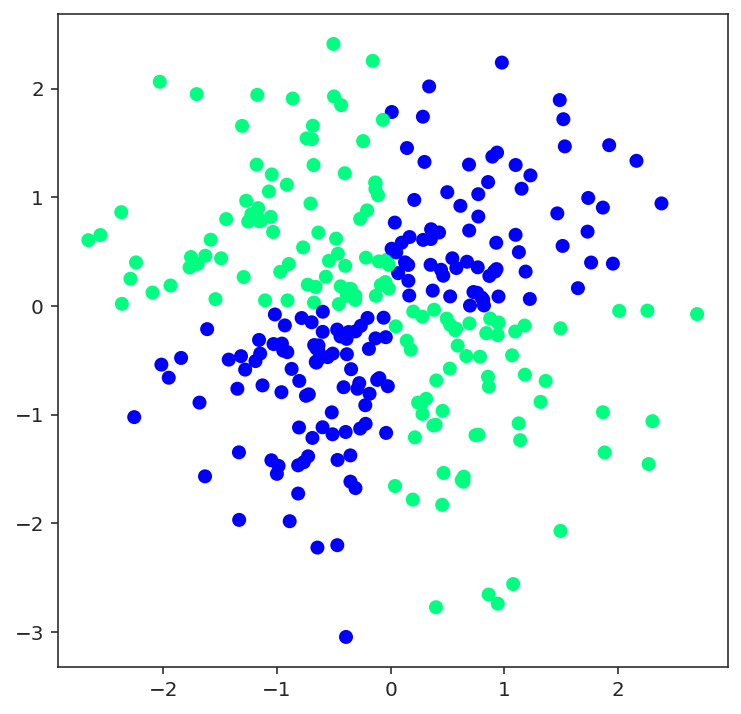

In [ ]:
# Simulación de mixturas
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)
# gráfico
fig = plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap ="winter");

En esta situación resulta imposible clasificar mediante un hiperpalno lineal ya que el error de clasificación que cometeríamos sería demasiado alto.

## <font color="steelblue">Medias lunas</font>

Esta situación recibe este nombre por el aspecto de la representación gráfica que se corresponde con dos medias lunas opuestas.

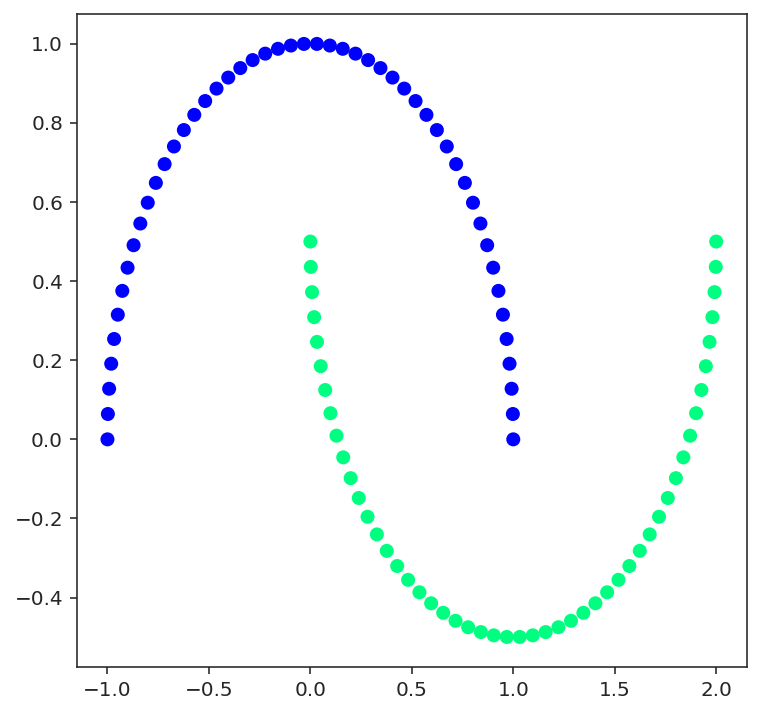

In [ ]:
# Datos
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
# gráfico
fig = plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap ="winter");

De nuevo en esta situación resulta imposible utilizar un hiperplano lineal para separar las observaciones asignadas a cada etiqueta.

## <font color="steelblue">Círculos concéntricos</font>

En este caso tenemos datos repartidos en dos círculos (uno alrededor del otro). Esto hace imposible utilizar un separador lineal y se hace necesario expandir la dimensión del espacio original para poder clasificar de forma adecuada.

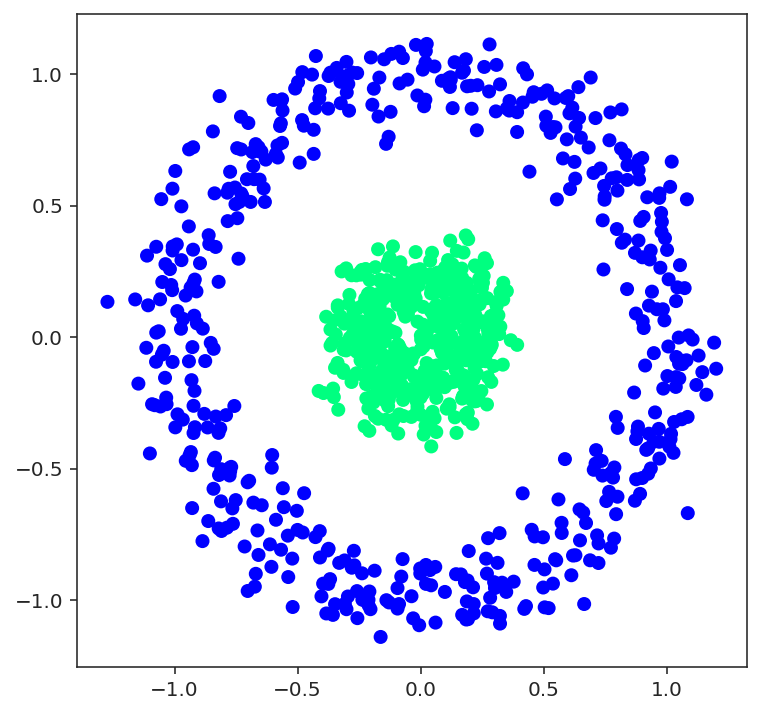

In [ ]:
# Datos
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
# gráfico
fig = plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap ="winter");

En las tres situaciones planteadas es necesario expandir las dimensiones del problema en cuestión para poder obtener clasificadores basados en hiperplanos lineales. A continuación, estudiamos los aspectos teóricos correspondientes a las máquinas de vector de soporte en este tipo de situaciones.

## <font color="steelblue">Aumento de dimensión y kernels</font>

La pregunta que nos queda por responder es ¿cómo aumentamos la dimensión del espacio y cúal es la dimensión correcta que debemos utilizar? La dimensión de un conjunto de datos puede transformarse combinando o modificando cualquiera de sus dimensiones. Por ejemplo, se puede transformar un espacio de dos dimensiones en uno de tres aplicando la siguiente función:

$$𝑓(𝑥_1,𝑥_2)=(𝑥_1^2,2\sqrt{x_1 x_2},𝑥_2^2)$$

Esta es solo una de las infinitas transformaciones posibles, ¿Cómo saber cuál es la adecuada? Es aquí donde el concepto de kernel entra en juego. Un kernel (K) es una función que devuelve el resultado del producto escalar entre dos vectores realizado en un nuevo espacio dimensional distinto al espacio original en el que se encuentran los vectores. Aunque no se ha entrado en detalle en las fórmulas matemáticas empleadas para resolver el problema de optimización, esta contiene un producto escalar. Si se sustituye este producto escalar por un kernel, se obtienen directamente los vectores soporte (y el hiperplano) en la dimensión correspondiente al kernel. A esto se le suele conocer como kernel trick porque, con solo una ligera modificación del problema original, se puede obtener el resultado para cualquier dimensión. A continuación se muestran los más utilizados. De ahora en adelante:

$$<x_i, x_j> = x_i^t x_j$$

representa el producto escalar entre $x_i$ y $x_j$.

### <font color="steelblue">Kernel lineal</font>

El kernel viene definido por la expresión:

$$k(x_i, x_j) = x^t_i x_j,$$

que es simplemente el producto escalar del vector de características. Si se emplea un Kernel lineal, el clasificador que obtenemos es idéntico al que obteníamos en el cuaderno anterior sin el aumento de dimensiones.

### <font color="steelblue">Kernel polinómico</font>

El kernel viene definido por la expresión:

$$k(x_i, x_j) = (\gamma x^t_i x_j +c)^d.$$

Cuando se emplea  $𝑑=1$  y  $𝑐=0$, el resultado es el mismo que el de un kernel lineal. Si  $𝑑>1$ , se generan límites de decisión no lineales, aumentando la no linealidad a medida que aumenta $𝑑$. No suele ser recomendable emplear valores de  $𝑑$  mayores 5 por problemas de sobre ajuste. El valor de $\gamma$ controla el comportamiento del kernel.

### <font color="steelblue">Kernel Gaussiano (RBF)</font>

El kernel viene definido por la expresión:

$$k(x_i, x_j) = exp(-\gamma||x-x^t||^2), \quad \gamma >0.$$

El valor de $\gamma$  controla el comportamiento del kernel, cuando es muy pequeño, el modelo final es equivalente al obtenido con un kernel lineal. A medida que aumenta su valor, también lo hace la flexibilidad del modelo.

### <font color="steelblue">Kernel sigmoidal</font>

El kernel viene definido por la expresión:

$$k(x_i, x_j) = tanh(\gamma x^t_i x_j+\tau).$$


Los kernels descritos son solo unos pocos de los muchos que existen. Cada uno tiene una serie de hiperparámetros cuyo valor óptimo puede encontrarse mediante validación cruzada. No puede decirse que haya un kernel que supere al resto, depende en gran medida de la naturaleza del problema que se esté tratando. Ahora bien, tal como indican los autores de A Practical Guide to Support Vector Classification, es muy recomendable probar el kernel RBF. Este kernel tiene dos ventajas: que solo tiene dos hiperparámetros que optimizar ( $\gamma$  y la penalización $𝐶$  común a todos los SVM) y que su flexibilidad puede ir desde un clasificador lineal a uno muy complejo.

# <font color="steelblue">SVM no lineales en python</font>

En `scikit-learn` la clase `sklearn.svm.SVC` permite utilizar el algoritmo SVM de clasificación mediante kernels, mientras que `sklearn.svm.SVR` utiliza el algoritmo SVM con kernels para problemas de regresión. 

Los parámetros más relevantes para la clase `sklearn.svm.SVC` son:

* **C: float, default=1.0**. Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positivo.

* **kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’**. Especifica el tipo de kernel que se utilizará en el algoritmo. Si no se especifica ninguno, se utilizará 'rbf'. 

* **degree: int, default=3**. Grado de la función de kernel polinómico ('poly'). Debe ser no negativo. Ignorado por todos los demás núcleos.

* **gamma: {‘scale’, ‘auto’} or float, default=’scale’**. Coeficiente del kernel para 'rbf', 'poly' y 'sigmoid'.
  * si se pasa gamma='scale' (por defecto), usa 1 / (n_características * X.var()) como valor de gamma,
  * si es 'auto', usa 1 / n_características
  * si es float, debe ser no negativo.


Los parámetros más relevantes para la clase `sklearn.svm.SVR` son:

* **C: float, default=1.0**. Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positivo.

* **kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’**. Especifica el tipo de kernel que se utilizará en el algoritmo. Por defecto se utiliza 'rbf'. 

* **degree: int, default=3**. Grado de la función de kernel polinómico ('poly'). Debe ser no negativo. Ignorado por todos los demás núcleos.

* **gamma: {‘scale’, ‘auto’} or float, default=’scale’**. Coeficiente del kernel para 'rbf', 'poly' y 'sigmoid'.
  * si se pasa gamma='scale' (por defecto), usa 1 / (n_características * X.var()) como valor de gamma,
  * si es 'auto', usa 1 / n_características
  * si es float, debe ser no negativo.

* **epsilon: float, default=0.1**. Épsilon en el modelo epsilon-SVR. Especifica el tubo épsilon dentro del cual no se asocia ninguna penalización en la función de pérdida de entrenamiento con puntos predichos dentro de una distancia épsilon del valor real. Debe ser no negativo.

# <font color="steelblue">Aplicaciones</font>

En este cuaderno se muestran diferentes aplicaciones del algoritmo general de los SVM. Recordemos que si usamos la opción `kernel = linear` reproducimos los resulatdos del cuaderno anterior. Comenzaremos analizando los ejemplos de introducción de este cuaderno y finalizaremos utilizando los ejemplos tratados en el cuaderno anterior en los que no obteníamos buenos resultados. 

Cargamos las clases necesarias:

In [ ]:
# SVM para clasificación
from sklearn.svm import SVC
# SVM para regresión
from sklearn.svm import SVR
# Modulos 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import mean_squared_error
import multiprocessing
import matplotlib.gridspec as gridspec
import itertools

In [ ]:
! pip install mlxtend --upgrade --no-deps
from mlxtend.plotting import plot_decision_regions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


## <font color="steelblue">Problemas de clasificación</font>

Comenzamos con los problemas de clasificación binaria y posteriormente analizaremos los de clasificación multiclase. 

### <font color="steelblue">Datos de mixturas</font>

Recapturamos los datos sobre mixturas introducidos la principio de este cuaderno. Vamos a ajustar cuatro modelos distintos con las opciones por defecto para cada uno de los cuatro kernels posibles: `linear`, `poly`, `rbf`, y `sigmoid`.

In [ ]:
# Datos
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

Realizamos la división en muestra de entrenamiento y validación y ajustamos los cuatro modelos.

In [ ]:
# División de muestras
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Modelos
clf1 = SVC(kernel = 'linear', random_state=123)
clf2 = SVC(kernel = 'poly', random_state=123)
clf3 = SVC(kernel = 'rbf', random_state=123)
clf4 = SVC(kernel = 'sigmoid', random_state=123)

Obtenemos una representación gráfica.

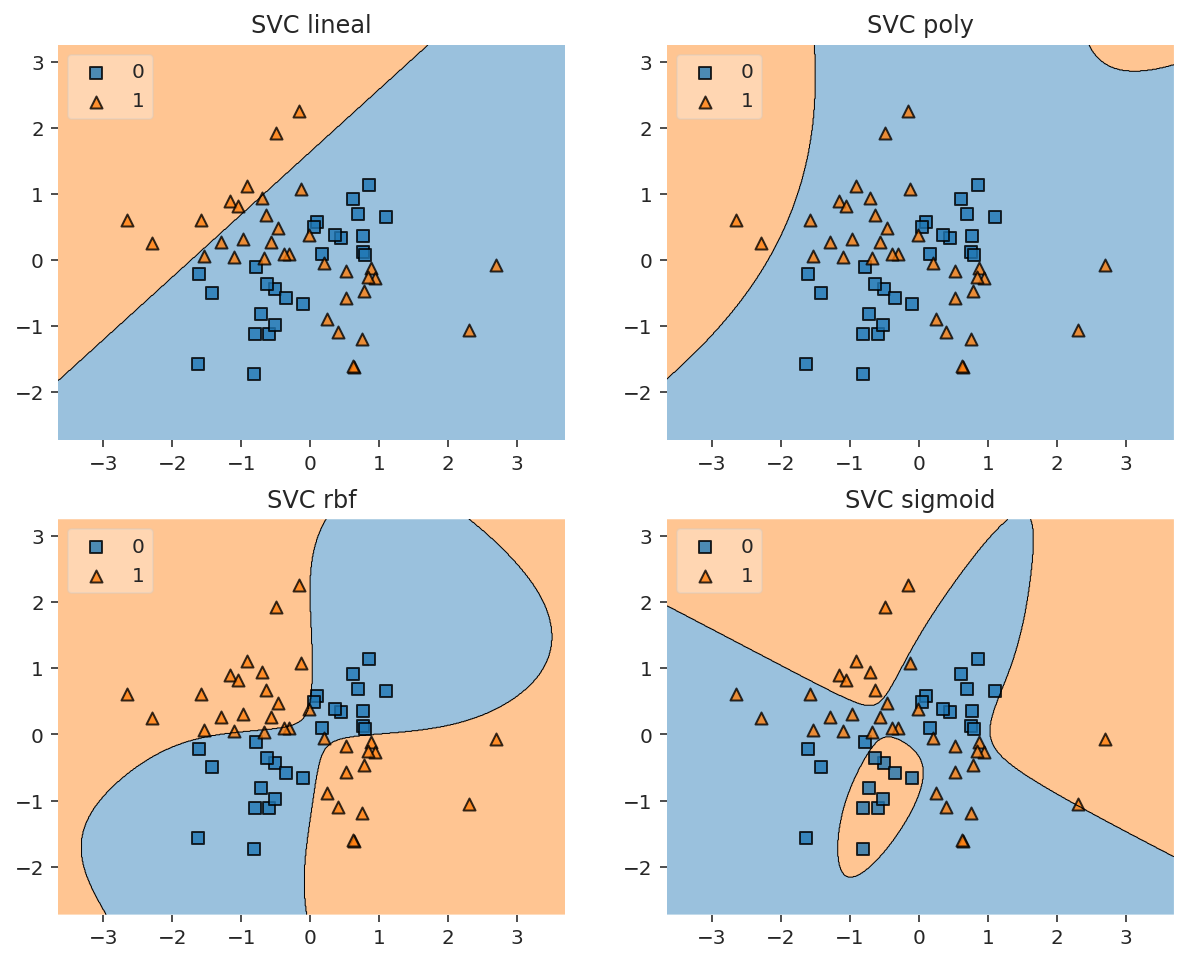

In [ ]:
# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

labels = ['SVC lineal', 'SVC poly', 'SVC rbf', 'SVC sigmoid']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)

plt.show()

Con las opciones por defecto podemos ver que la única solución que parece tener un alto porcentaje de clasificacción correcta es usando el kernel rbf. Analizamos dicho porcentaje para cada uno de los algoritmos propuestos.

In [ ]:
# Medidas de calidad del modelo propuesto
print('El valor exactitud para SVR lineal: %.2f'%clf1.score(X_test, y_test))
print('El valor exactitud para SVR poly: %.2f'%clf2.score(X_test, y_test))
print('El valor exactitud para SVR rbf: %.2f'%clf3.score(X_test, y_test))
print('El valor exactitud para SVR sigmoid: %.2f'%clf4.score(X_test, y_test))

El valor exactitud para SVR lineal: 0.55
El valor exactitud para SVR poly: 0.45
El valor exactitud para SVR rbf: 0.92
El valor exactitud para SVR sigmoid: 0.42


Con el kernel rbf obtenemos un porcentaje de clasficación correcto del 92% con las opciones por defecto del algoritmo. A continuación utilizamos grid search para ajustar los parámetros en cada uno de los modelos para llegar a la solución óptima. 

In [ ]:
# Búsqueda para el kernel lineal
# Rango de valores de C y gamma
parameters = {"C": [0.001,1,10,100,1000]}
# Algoritmo gridsearch
gridsearch1 = GridSearchCV(
    estimator = SVC(kernel = 'linear', random_state=123), 
    param_grid = parameters,
    n_jobs = multiprocessing.cpu_count() - 1)
# Ajustes
gridsearch1.fit(X_train, y_train.ravel())
# Solución óptima
gridsearch1.best_params_

{'C': 1}

In [ ]:
# Búsqueda para el kernel poly
# grid de valores
parameters = {"C": [0.001,1,10,100,1000], "degree":[2,3,4,5]}

# Algoritmo gridsearch
gridsearch2 = GridSearchCV( estimator = SVC(kernel = 'poly', random_state=123), 
                           param_grid = parameters, 
                           n_jobs = multiprocessing.cpu_count() - 1)

# Ajustes
gridsearch2.fit(X_train, y_train.ravel())

# Solución óptima
gridsearch2.best_params_

{'C': 100, 'degree': 2}

In [ ]:
# Búsqueda para el kernel rbf
# grid de valores
parameters = {"C": [0.001,1,10,100,1000], "gamma":[1,0.1,0.01,0.001]}

# Algoritmo gridsearch
gridsearch3 = GridSearchCV( estimator = SVC(kernel = 'rbf', random_state=123), 
                           param_grid = parameters, 
                           n_jobs = multiprocessing.cpu_count() - 1)

# Ajustes
gridsearch3.fit(X_train, y_train.ravel())

# Solución óptima
gridsearch3.best_params_

{'C': 100, 'gamma': 1}

In [ ]:
# Búsqueda para el kernel sigmoid
# grid de valores
parameters = {"C": [0.001,1,10,100,1000], "gamma":[1,0.1,0.01,0.001]}

# Algoritmo gridsearch
gridsearch4 = GridSearchCV( estimator = SVC(kernel = 'sigmoid', random_state=123), 
                           param_grid = parameters, 
                           n_jobs = multiprocessing.cpu_count() - 1)

# Ajustes
gridsearch4.fit(X_train, y_train.ravel())

# Solución óptima
gridsearch4.best_params_

{'C': 100, 'gamma': 0.01}

Una vez obtenidos los parámetros para cada uno de los kernels podemos obtener la exactitud asociada a cada uno de ellos.

In [ ]:
# Medidas de calidad del modelo propuesto
print('El valor exactitud para SVR lineal: %.2f'%gridsearch1.score(X_test, y_test))
print('El valor exactitud para SVR poly: %.2f'%gridsearch2.score(X_test, y_test))
print('El valor exactitud para SVR rbf: %.2f'%gridsearch3.score(X_test, y_test))
print('El valor exactitud para SVR sigmoid: %.2f'%gridsearch4.score(X_test, y_test))

El valor exactitud para SVR lineal: 0.55
El valor exactitud para SVR poly: 1.00
El valor exactitud para SVR rbf: 0.97
El valor exactitud para SVR sigmoid: 0.55


En este caso hemos mejorado la exactitud en todos los modelos, donde por ejemplo hemos alcanzado el 100% para el kernel polinómico y el 97% para el kernel gaussiano. Sin embargo, la velocidad de estimación es mucho mejor para el kernel gaussiano. Veamos la solución gráfica para cada uno de ellos.

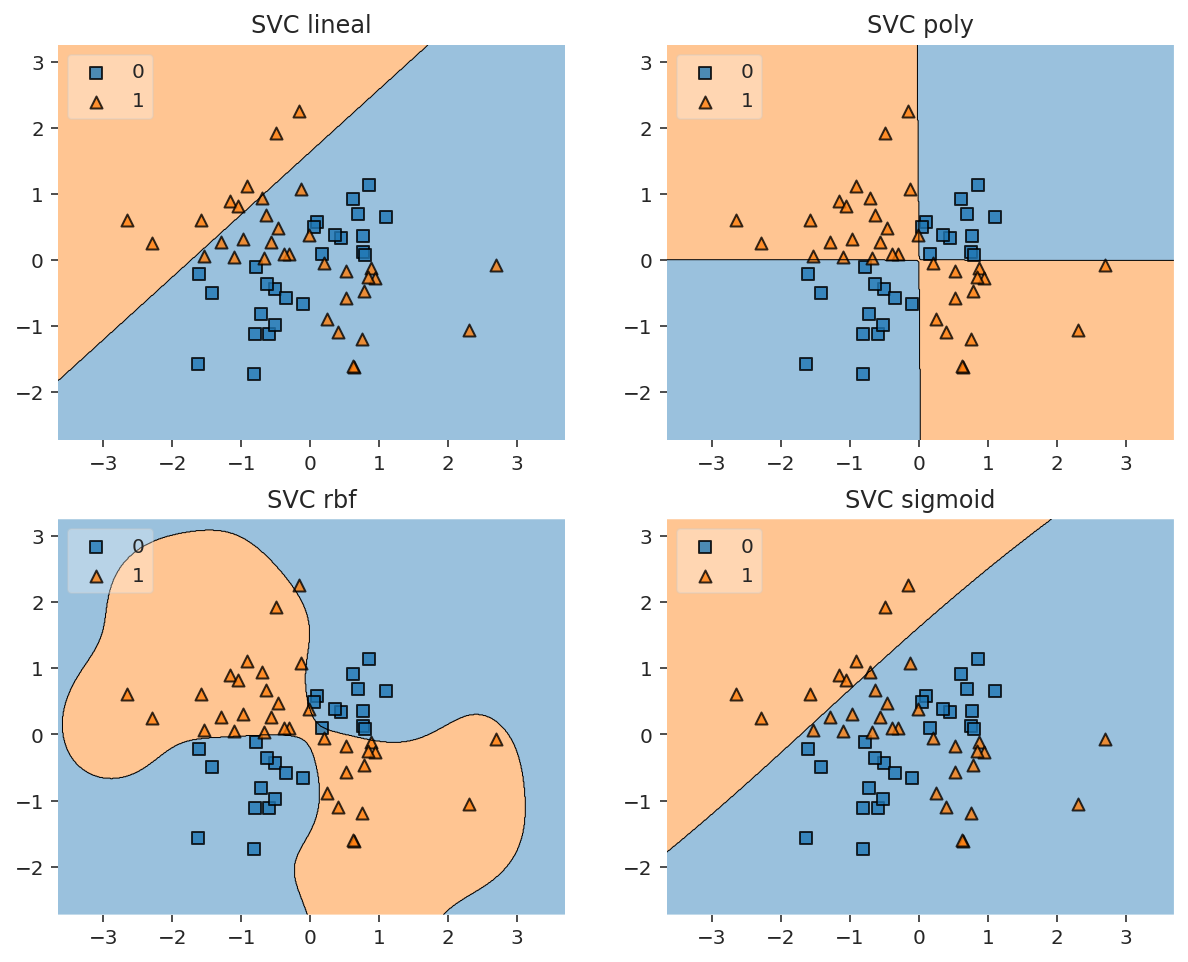

In [ ]:
# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

labels = ['SVC lineal', 'SVC poly', 'SVC rbf', 'SVC sigmoid']
for clf, lab, grd in zip([gridsearch1, gridsearch2, gridsearch3, gridsearch4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)

plt.show()

Aunque no vamos a profundizar más en la solución obtenida es recomentable estudiar la matriz de confusión para un análisis completo del modelo propuesto. Dada la velocidad de cálculo que muestra el kernel gaussiano, en el resto de ejemplos trabajaremos únicamente con él utilizando grid search para optimizar los parámetros del modelo.

### <font color="steelblue">Datos de medias lunas</font>

Recapturamos los datos sobre medias lunas introducidos la principio de este cuaderno.

In [ ]:
# Datos
X, y = make_moons(n_samples=100, random_state=123)

In [ ]:
# División de muestras
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Modelo
# Búsqueda para el kernel rbf
# grid de valores
parameters = {"C": [0.001,1,10,100,1000], "gamma":[1,0.1,0.01,0.001]}
# Algoritmo gridsearch
gridsearch = GridSearchCV( estimator = SVC(kernel = 'rbf', random_state=123), 
                           param_grid = parameters, 
                           n_jobs = multiprocessing.cpu_count() - 1)
# Ajustes
gridsearch.fit(X_train, y_train.ravel())
# Solución óptima
gridsearch.best_params_

{'C': 1, 'gamma': 1}

Veamos la solución gráfica de la regiones de clasficación determinadas por el algoritmo.

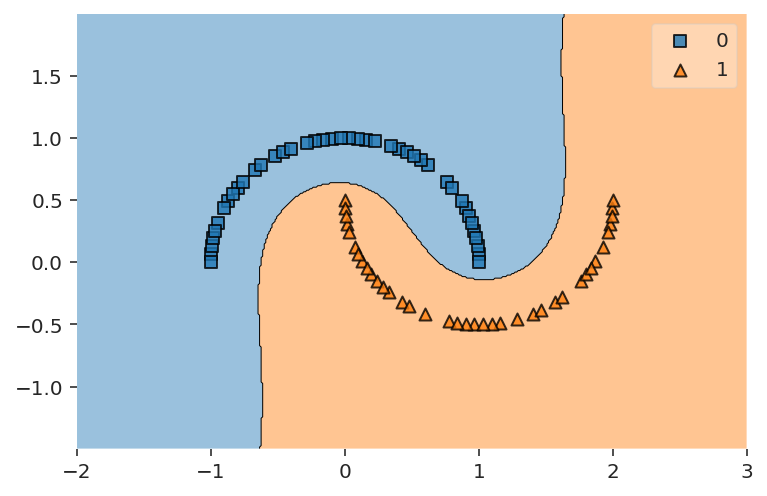

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X_train,
    y = y_train,
    clf = gridsearch,
    ax = ax
);

A la vista del gráfico ya se puede ver que la exactitud será del 100% para este conjunto de datos.

### <font color="steelblue">Datos de circulos concéntricos</font>

Recapturamos los datos sobre círculos concéntricos introducidos la principio de este cuaderno.

In [ ]:
# Datos
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

Dividimos y ajustamos el modelo

In [ ]:
# División de muestras
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Modelo
# Búsqueda para el kernel rbf
# grid de valores
parameters = {"C": [0.001,1,10,100,1000], "gamma":[1,0.1,0.01,0.001]}
# Algoritmo gridsearch
gridsearch = GridSearchCV( estimator = SVC(kernel = 'rbf', random_state=123), 
                           param_grid = parameters, 
                           n_jobs = multiprocessing.cpu_count() - 1)
# Ajustes
gridsearch.fit(X_train, y_train.ravel())
# Solución óptima
gridsearch.best_params_

{'C': 1, 'gamma': 1}

La solución gráfica de la regiones de clasificación viene dada por:

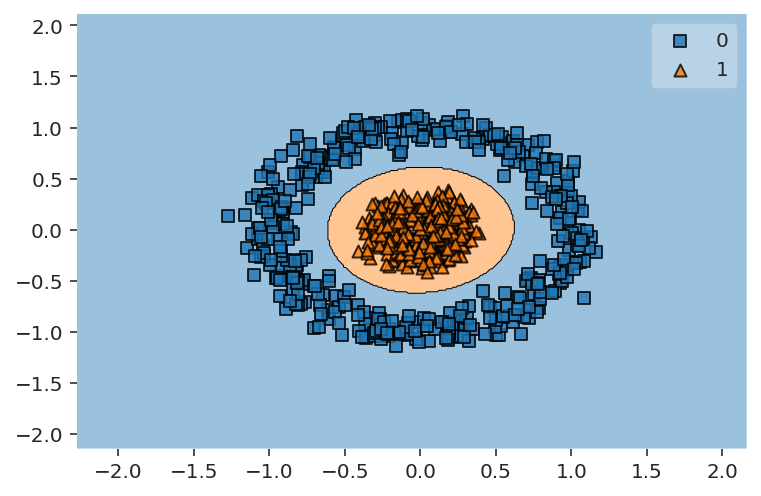

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X_train,
    y = y_train,
    clf = gridsearch,
    ax = ax
);

De nuevo, se puede ver un porcentaje de clasificación correcta del 100%, por lo que no profundizamos más en el análisis.

### <font color="steelblue">Iris dataset</font>

Comenzamos el uso de datos reales con el banco de datos de Iris. Utilizamos la misma estructura de datos del cuaderno anterior para poder comparar el resultado del kernel lineal con el el kernel gaussiano. Cargamos los datos y dividimos en muestra de entrenamiento y validación. Recordemos que en este caso estamos utilizando como predictoras la longitud y anchura de sépalo

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
# División de muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Ajustamos los modelos de kernel lineal y gaussiano para comparar los resultados. Buscamos el modelo óptimo en cada caso mediante gridsearch. 

In [ ]:
# Búsqueda para el kernel lineal
# Rango de valores de C y gamma
parameters = {"C": [0.001,1,10,100,1000]}
# Algoritmo gridsearch
gridsearch1 = GridSearchCV(
    estimator = SVC(kernel = 'linear', random_state=123), 
    param_grid = parameters,
    n_jobs = multiprocessing.cpu_count() - 1)
# Ajustes
gridsearch1.fit(X_train, y_train.ravel())
# Solución óptima
gridsearch1.best_params_

{'C': 10}

In [ ]:
# Búsqueda para el kernel rbf
# grid de valores
parameters = {"C": [0.001,1,10,100,1000], "gamma":[1,0.1,0.01,0.001]}

# Algoritmo gridsearch
gridsearch2 = GridSearchCV( estimator = SVC(kernel = 'rbf', random_state=123), 
                           param_grid = parameters, 
                           n_jobs = multiprocessing.cpu_count() - 1)

# Ajustes
gridsearch2.fit(X_train, y_train.ravel())

# Solución óptima
gridsearch2.best_params_

{'C': 10, 'gamma': 0.01}

Analizamos la exactitud de cada uno de los modelos.

In [ ]:
# Medidas de calidad del modelo propuesto
print('El valor exactitud para SVR lineal: %.2f'%gridsearch1.score(X_test, y_test))
print('El valor exactitud para SVR gaussiano: %.2f'%gridsearch2.score(X_test, y_test))

El valor exactitud para SVR lineal: 0.80
El valor exactitud para SVR gaussiano: 0.80


Con ambos modelos obetenemos la misma exactitud (80%) que es bastante superior al 68% que obteníamos en el cuaderno anterior con la clase `sklearn.svm.LinearSVC`. Veamos las soluciones gráficas obtenidas en cada uno de los modelos.

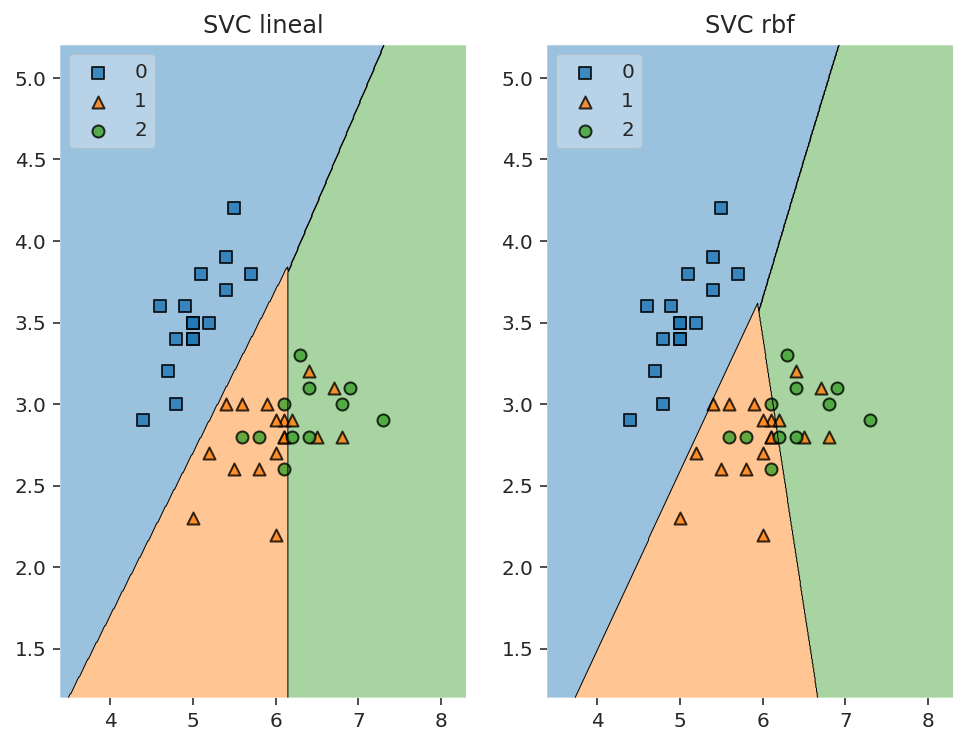

In [ ]:
# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(8,6))

labels = ['SVC lineal', 'SVC rbf']
for clf, lab, grd in zip([gridsearch1, gridsearch2],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)

plt.show();

La solución obtenida es prácticamente idéntica. Analizamos con más detalle la solución con rbf. Obtenemos la matriz de confusión y el informe completo para determinar el porcentaje de clasificación correcto en cada etiqueta de la respuesta.

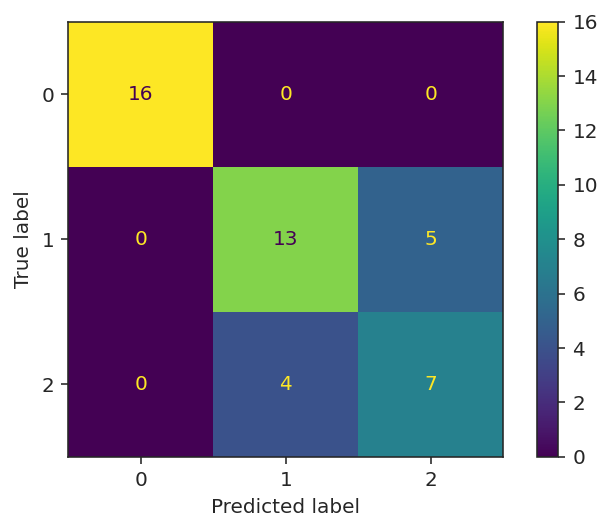

In [ ]:
predicciones = gridsearch2.predict(X_test)
# Matriz de confusión
cm = confusion_matrix(y_test, predicciones, labels = gridsearch2.classes_)
# Solución gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gridsearch2.classes_)
# Representamos
disp.plot();

Se puede ver como hemos mejorado los resultados con la etiqueta 1 con respecto a lo obtenido en el cuaderno anterior, pero repecto de la etiqueta 2 no observamos mejoría. 

In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.76      0.72      0.74        18
           2       0.58      0.64      0.61        11

    accuracy                           0.80        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.80      0.80      0.80        45



Vemos como el porcentaje de clasificación corecto de la etiqueta 2 se sitúa en el 64%, mientras que aumenta hasta el 72% en la etiqueta 1, y del 100% en la etiqueta 0. En este caso podemos concluir que al usar esas dos predictoras tenemos bastante certeza a la hora de clasificar la etiqueta 0, pero no ocurre lo mismo con las otras dos.

### <font color="steelblue">Abalone</font>

Este es el mismo banco de datos del cuaderno anterior donde el algoritmo de clasificación utilizado alcanzaba un porcentaje de clasificación correcto del 54.8%. Veamos si podemos mejorar este resultado con el nuevo algortimo. En este caso utilizamos únicamente la solución rbf. Cargamos y preparamos los datos.

In [ ]:
# Lectura de datos
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/abalone.csv'
abalone = pd.read_csv(url)
# Preparamos datos
X_abalone = abalone.drop(columns='Sex')
y_abalone = abalone['Sex'].astype('category')
# Estandarizamos datos
sc = StandardScaler()
X_abalone_std = sc.fit_transform(X_abalone)

# División de muestras estandarizadas
X_train_abalone, X_test_abalone, y_train_abalone, y_test_abalone = train_test_split(X_abalone_std, y_abalone, test_size=0.20, random_state=0)

Ajustamos el modelo

In [ ]:
# Búsqueda para el kernel rbf
# grid de valores
parameters = {"C": [0.001,1,10,100,1000], "gamma":[1,0.1,0.01,0.001]}

# Algoritmo gridsearch
gridsearch = GridSearchCV( estimator = SVC(kernel = 'rbf', random_state=123), 
                           param_grid = parameters, 
                           n_jobs = multiprocessing.cpu_count() - 1)

# Ajustes
gridsearch.fit(X_train_abalone, y_train_abalone.ravel())

# Solución óptima
gridsearch.best_params_

{'C': 100, 'gamma': 0.01}

Analizamos la exactitud:

In [ ]:
# Medidas de calidad del modelo propuesto
np.round(gridsearch.score(X_test_abalone, y_test_abalone),3)


0.565

Hemos mejorado en un 2% el porcentaje de clasificación corecta pero no podemos representar gráficamente la solución ya que el número de predictoras es mayor a 2. Analizamos directamente la matriz de confusión y el informe de clasificación completo:

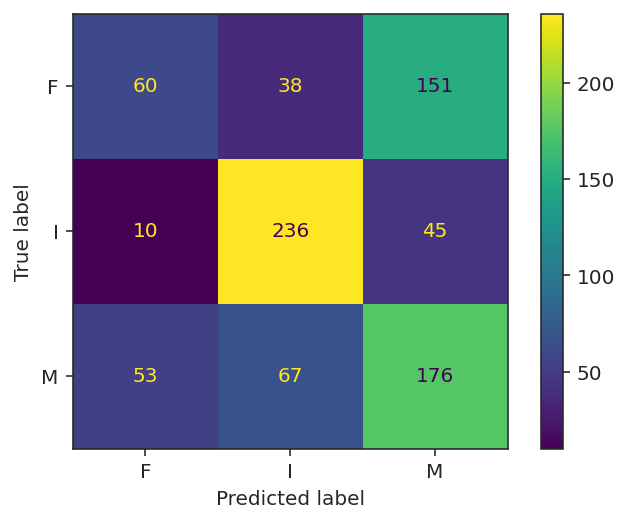

In [ ]:
predicciones = gridsearch.predict(X_test_abalone)
# Matriz de confusión
cm = confusion_matrix(y_test_abalone, predicciones, labels = gridsearch.classes_)
# Solución gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gridsearch.classes_)
# Representamos
disp.plot();

In [ ]:
print(classification_report(y_test_abalone, predicciones))

              precision    recall  f1-score   support

           F       0.49      0.24      0.32       249
           I       0.69      0.81      0.75       291
           M       0.47      0.59      0.53       296

    accuracy                           0.56       836
   macro avg       0.55      0.55      0.53       836
weighted avg       0.55      0.56      0.54       836



En este caso mantenemos o mejorarmos los porcentajes de clasificación correcto de las etiquetas $I$ y $M$, pero empeoramos bastante el correspondiente a la etiqueta $F$, respecto de la solución obtenida en el cuaderno anterior.

## <font color="steelblue">Problemas de regresión</font>

Analizamos ahora diferentes situaciones de modelos de regresión utilizando el algoritmo correspondiente con el kernel rbf. Empezamos con el banco de datos diabetes.

### <font color="steelblue">Diabetes</font>

Como comentamos en cuadernos anteriores, este conjunto de datos trata de un estudio sobre la diabetes que se realizó con el objetivo de obtener una medida cuantitativa de la progresión de la enfermedad un año después de la línea de base. Como la variable objetivo es numérica llevaremos a cabo un ajuste de regresión. 

Ya viene pretratada (tratamiento de valores perdidos y estandarización), pero se cargan por separado las predictoras y la respuesta.

In [ ]:
# Carga de datos diabetes
from sklearn.datasets import load_diabetes
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)
X_diabetes_df = pd.DataFrame(X_diabetes)
y_diabetes_df = pd.DataFrame(y_diabetes)
columnas = ["age", "sex", "bmi", "bp", "tc", "ldl", "hdl", "tch", "Itg", "glu", "disease_progression"]
# unimos los datos
diabetes = pd.merge(X_diabetes_df,y_diabetes_df, left_index=True, right_index=True)
diabetes.columns = columnas

Una vez cargados los datos separamos en muestra de entrenamiento y validación.

In [ ]:
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes_df, y_diabetes_df, 
                                                                                        test_size=0.3, random_state=42)

Ajustamos el modelo teniendo en cuenta la variabilidad de la respuesta para fijar el rango de épsilon.

In [ ]:
# Búsqueda para el kernel rbf
# grid de valores
parameters = {"C": [0.001,1,10,100], 
              "gamma":[1,0.1,0.01,0.001], 
              "epsilon":[0.1,0.3,0.5,0.7,0.9]}

# Algoritmo gridsearch
gridsearch = GridSearchCV( estimator = SVR(kernel = 'rbf'), 
                           param_grid = parameters, 
                           n_jobs = multiprocessing.cpu_count() - 1)

# Ajustes
gridsearch.fit(X_train_diabetes, y_train_diabetes.values.ravel())

# Solución óptima
gridsearch.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 1}

Obtenemos ahora las medidas de calidad del ajuste y las comparamos con las obtenidas en el cuaderno anterior para este mismo banco de datos.

In [ ]:
# Predicciones del modelo
predicciones = gridsearch.predict(X_test_diabetes)
# Medidas de calidad del modelo propuesto
print('El valor del R2 es: %.2f'%gridsearch.score(X_test_diabetes, y_test_diabetes))
print('El valor de RMSE es: %.4f'%mean_squared_error(y_test_diabetes, predicciones, squared = False))

El valor del R2 es: 0.47
El valor de RMSE es: 53.3145


El $R^2$ obtenido menos preciso en un 1% que el del cuaderno anterior. Además, el RMSE ha aumentado, pasando de 53.111 a 53.315. Tenemos un modelo menos preciso. Representamos los valores observados en la muestra de validación frente a los predichos para valorar la solución. 



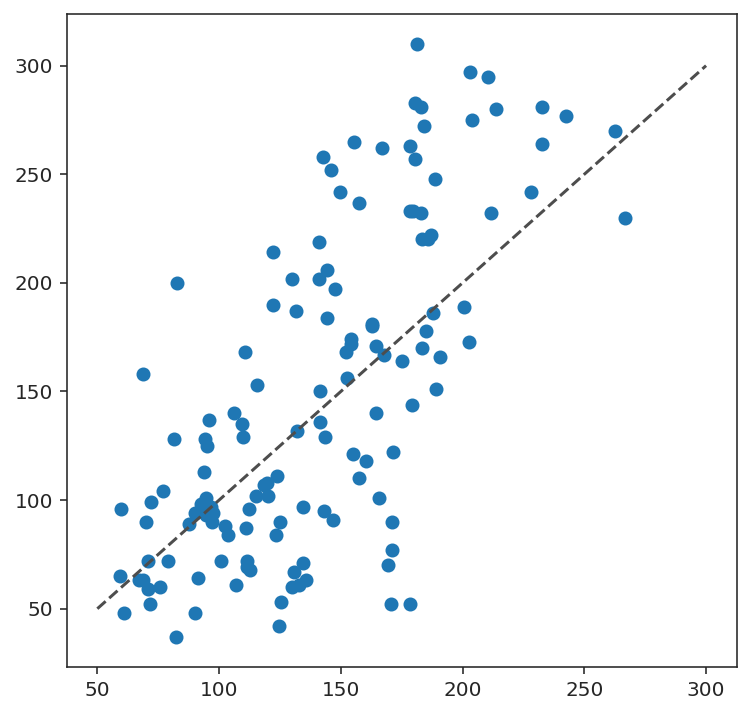

In [ ]:
# Nube de puntos original
#plt.scatter(X_test_diabetes, y_test_diabetes) 
# Modelo predicho
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(predicciones, y_test_diabetes)  
ax.plot([50, 300], [50, 300], ls="--", c=".3");

La línea punteada representa el ajuste perfecto y podemos ver como la nube de puntos se acerca bastante a dicha solución. Hay que tener en cuenta que el error observado se debe a la variabilidad en la respuesta. 

### <font color="steelblue">California housing</font>

En este caso tratamos los datos de precios de viviendas en California tratados anteriormente. Consideramos los datos pretratados eliminando la variable predictora factor. Cargamos y preparamos los datos.

In [ ]:
# HousingCA Dataset 
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/housingCA_clean.csv'
housingCA = pd.read_csv(url)
# Nombres de las variables que no utilizaremos
columnas= ['median_house_value','ocean_proximity_INLAND',
           'ocean_proximity_ISLAND','ocean_proximity_NEAR BAY',
           'ocean_proximity_NEAR OCEAN']
# Datos
X = housingCA.drop(columns=columnas)
y = housingCA['median_house_value']
# División de muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Ajustamos el modelo de la forma habitual, pero en primer lugar estudiamos la variabilidad de la respuesta.

In [ ]:
y_train.std()

1.003088770101156

Ahora el modelo. Para obtener el óptimo utilizamos gridsearch implementando el código que vemos a continuación. No lo ponemos para ejecutar porque el tiempo de carga es muy elevado, por ello aportamos directamente la solución.



```
# Búsqueda para el kernel rbf
# grid de valores
parameters = {"C": [0.001,1,10,100], 
              "gamma":[1,0.1,0.01,0.001], 
              "epsilon":[0.1,0.3,0.5,0.7,0.9]}

# Algoritmo gridsearch
gridsearch = GridSearchCV( estimator = SVR(kernel = 'rbf'), 
                           param_grid = parameters, 
                           n_jobs = multiprocessing.cpu_count() - 1)

# Ajustes
gridsearch.fit(X_train, y_train.ravel())

# Solución óptima
gridsearch.best_params_
```



{'C': 100, 'epsilon': 0.3, 'gamma': 0.1}

In [ ]:
gridsearch = GridSearchCV( estimator = SVR(kernel = 'rbf'), 
                           param_grid = {"C":[100], "gamma":[0.1], "epsilon":[0.3]})

# Ajustes
gridsearch.fit(X_train, y_train.ravel())

GridSearchCV(estimator=SVR(),
             param_grid={'C': [100], 'epsilon': [0.3], 'gamma': [0.1]})

Obtenemos las predicciones y los valores de $R^2$ y de RMSE.

In [ ]:
# Predicciones del modelo
predicciones = gridsearch.predict(X_test)
# Medidas de calidad del modelo propuesto
print('El valor del R2 es: %.2f'%gridsearch.score(X_test, y_test))
print('El valor de RMSE es: %.4f'%mean_squared_error(y_test, predicciones, squared = False))

El valor del R2 es: 0.63
El valor de RMSE es: 0.6021


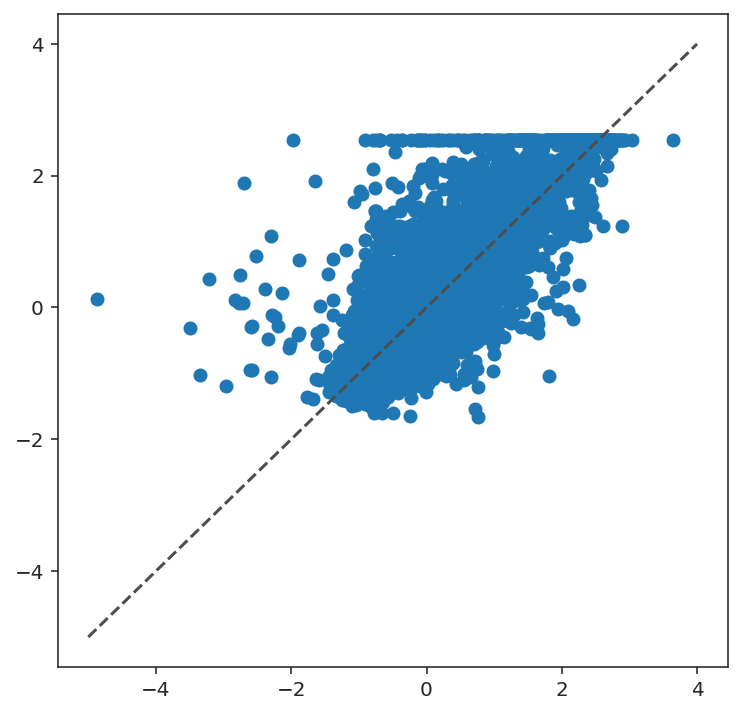

In [ ]:
# Nube de puntos original
#plt.scatter(X_test_diabetes, y_test_diabetes) 
# Modelo predicho
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(predicciones, y_test)  
ax.plot([-5, 4], [-5, 4], ls="--", c=".3") ;

La línea punteada representa el ajuste perfecto, los valores predichos se acercan al valor real pero se observa una variabilidad, por ello se obtiene un valor de $R^2$ de 0.63.

# <font color="steelblue">Referencias y enlaces de interés</font>

Manuales

* Aurélien Géron (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems. O’Reilly Media.

* Peters Morgan (2018). Data Analysis From Scratch With Python: Beginner Guide using Python, Pandas, NumPy, Scikit-Learn, IPython, TensorFlow and Matplotlib. AI Sciences LLC.

* Sebastian Raschka, Vahid Mirjalili (2017). Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow. Packt Publishing.

* Julian Avila (2017). Scikit-Learn Cookbook: Over 80 Recipes for Machine Learning in Python With Scikit-Learn. Packt Publishing

Enlaces

* https://www.cienciadedatos.net/documentos/py24-svm-python.html

* https://github.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/master/05.SVMs.ipynb

* https://github.com/Nyandwi/machine_learning_complete/blob/main/6_classical_machine_learning_with_scikit-learn/3_support_vector_machines_for_regression.ipynb

* https://github.com/Nyandwi/machine_learning_complete/blob/main/6_classical_machine_learning_with_scikit-learn/4_support_vector_machines_for_classification.ipynb

* https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#support-vector-machines-svms
